In [1]:
#| include: false
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from tqdm.auto import tqdm

## Introduction
Kmeans is one of the easiest and fastest clustering algorithms. Here we tweak the algorithm to cluster vectors with unit length.

## Data
We randomly generate a million data points with 768 dimensions (usual size in transformer embeddings). And then we normalize all those data points to unit length.

In [2]:
N = 1000000
D = 768
x = F.normalize(torch.randn(N, D), dim=-1)

## Algorithm
The following shows our kmeans implementation. The steps are as follows:
1. Choose `n_clusters` points from our dataset randomly and set them as our initial centroids.
2. Iterate through all datapoints and assign each point to one of the centroids.
3. Recalculate centroids based by averaging datapoints assigned to each cluster. As an additional step to usual kmeans, normalize to unit length.
4. Repeat from step 2, for `epochs` iterations.

In order to preserve some memory usage we calculate similarity batch-wise and store simply the largest index (`argmax`).

In [3]:
class KMeans:
    def __init__(self, n_clusters, batch_size, epochs):
        self.n_clusters = n_clusters
        self.batch_size = batch_size
        self.epochs = epochs
        self.centers = None
        self.similarities = []
        
    def fit(self, x):
        if self.centers is None:
            idx = np.random.choice(len(x), self.n_clusters, replace=False)
            centers = x[idx]
        else:
            centers = self.centers
        
        for _ in range(self.epochs):
            batch_cluster = []
            similarity_mean = 0
            for i in tqdm(range(0, len(x), self.batch_size)):
                similarity, idx = (x[i:i+self.batch_size] @ centers.T).max(dim=-1)
                similarity_mean += similarity.sum()
                batch_cluster.append(idx)
            x_assigned_cluster = torch.cat(batch_cluster)    
            centers = torch.stack(
                [
                    F.normalize(x[x_assigned_cluster==i].mean(dim=0), dim=-1)
                    for i in range(self.n_clusters)
                ]
            )
            self.similarities.append(similarity_mean / len(x))
        
        self.centers = centers
                

In [4]:
kmeans = KMeans(1000, 64, 10)
kmeans.fit(x)

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

  0%|          | 0/15625 [00:00<?, ?it/s]

You can see the similarities converging below:

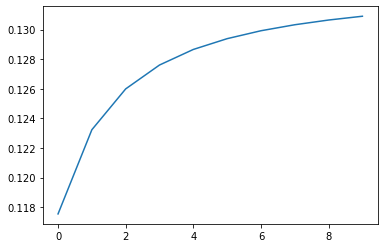

In [5]:
plt.plot(kmeans.similarities)

## Shameless Self Promotion
If you enjoyed the tutorial [buy my course](https://www.udemy.com/course/machine-learning-and-data-science-2021/?referralCode=E79228C7436D74315787) (usually 90% off).